In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import mne
mne.set_log_level(verbose=False)

from Datasets import *

In [2]:
path = "../Data/PSG1.edf"

In [3]:
dataset = EDFData_PTH(path)

e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(path)


In [4]:
for a,b in dataset:
    break

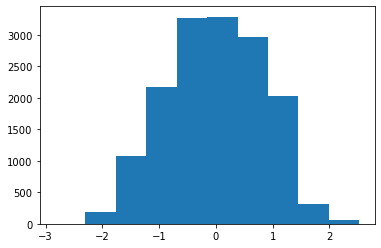

In [5]:
plt.figure()
plt.hist(a[0])
plt.show()

In [6]:
import glob

In [7]:
datasets = [EDFData_PTH(path_glob, channels=["C3"]) for path_glob in tqdm(glob.glob("../Data/*.edf"))]

e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Omitted 92 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Omitted 120 annotation(s) that were outside data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datasets.py:21: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(path)
e:\Python\TFM\SSD_IA3\Notebooks\Datas

In [8]:
dataset_concat = torch.utils.data.ConcatDataset(datasets)
len(dataset_concat)

11282

In [9]:
test_size = 0.3
test_size = int(len(dataset_concat)*test_size)
train_size = len(dataset_concat) - test_size
train, test = torch.utils.data.random_split(dataset_concat, [train_size, test_size], generator=torch.Generator().manual_seed(42))
len(train), len(test)

(7898, 3384)

In [11]:
idx_train = np.loadtxt("../indices_train.txt")
idx_test = np.loadtxt("../indices_test.txt")
len(idx_train), len(idx_test)

(9776, 5265)

In [13]:
a = torch.utils.data.Subset(dataset_concat, indices=idx_train[:len(train)])
len(a)

7898

In [17]:
sorted(glob.glob("../Data/*.edf"), key=len)

['../Data\\PSG1.edf',
 '../Data\\PSG2.edf',
 '../Data\\PSG3.edf',
 '../Data\\PSG4.edf',
 '../Data\\PSG5.edf',
 '../Data\\PSG6.edf',
 '../Data\\PSG7.edf',
 '../Data\\PSG8.edf',
 '../Data\\PSG9.edf',
 '../Data\\PSG11.edf',
 '../Data\\PSG12.edf',
 '../Data\\PSG13.edf',
 '../Data\\PSG14.edf']